<a href="https://colab.research.google.com/github/gavinhsu/Natural-Language-Processing-in-TensorFlow-/blob/master/ResNet3_0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part1

In [0]:
# 資料預處理
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

img1 = "cat.11679.jpg"
img2 = "dog.2811.jpg"
img3 = "dog.12486.jpg"
img4 = "dog.6431.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(20, 10)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(20, 5)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=8)
        f.tight_layout()

In [0]:
from keras.applications.resnet50 import ResNet50
resnet_weights = 'resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet_model = ResNet50(weights=resnet_weights)
_get_predictions(resnet_model)

ValueError: ignored

Part2

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os

resnet = ResNet50(weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
resnet.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras import Model, layers

x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(resnet.input, predictions)

optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'shapes/train',
    batch_size=32,
    class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    'shapes/validation',
    shuffle=False,
    class_mode='binary',
    target_size=(224,224))

Found 300 images belonging to 3 classes.
Found 300 images belonging to 4 classes.


In [0]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=1,  # added in Kaggle
                              epochs=3,
                              validation_data=validation_generator,
                              validation_steps=2  # added in Kaggle
                             )

Epoch 1/3
1/1 [==============================] - 5s 5s/step - loss: nan - acc: 0.3125 - val_loss: 0.6931 - val_acc: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 208ms/step - loss: nan - acc: 0.3750 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 205ms/step - loss: nan - acc: 0.2188 - val_loss: nan - val_acc: 0.0000e+00


In [0]:
# save
model.save('models/keras/model.h5')

OSError: ignored

In [0]:
import os
path = "models/keras/model.h5"
os.mkdir(path)

FileNotFoundError: ignored

In [0]:
# predict
path = ["dog.2811.jpg"]
img_list = [Image.open(img_path) for img_path in path]
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224))))
                             for img in img_list])
pred_probs = model.predict(validation_batch)
pred_probs

array([[nan, nan]], dtype=float32)

TypeError: ignored

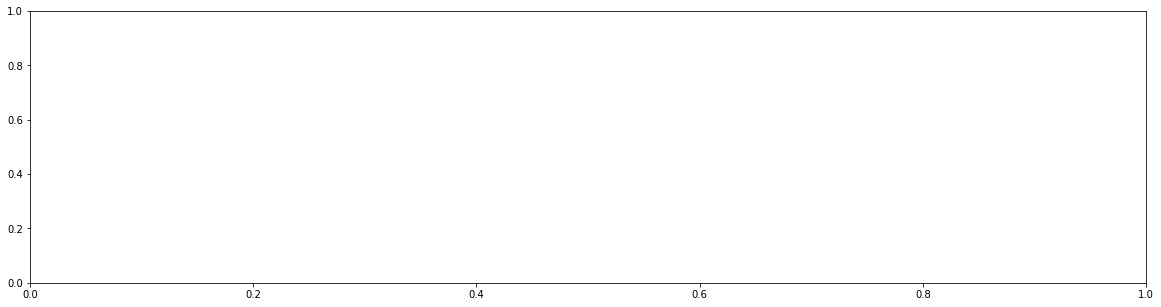

In [0]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% chimmy, {:.0f}% mang".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)

In [0]:
# 備註
def _get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = resnet50.predict(img_data)
    return resnet_features

img_path = "chimmy1.jpeg"
resnet_features = _get_features(img_path)

In [0]:
features_representation_1 = resnet_features.flatten()
print ("Shape 1: ", features_representation_1.shape)

Shape 1:  (100352,)
